In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pandas import DataFrame, Series
from relative_path import OUTPUT_TRANSFORM

In [2]:
FILE_PARQUET = OUTPUT_TRANSFORM / "processed_track.parquet"

In [3]:
# Reading the tracks data
df_tracks_processed = pd.read_parquet(FILE_PARQUET)

# Renaming columns
df_tracks_processed.rename(columns={
        "total_followers": "artist_total_followers", 
        "mean_popularity": "artist_mean_popularity"
    }, errors="ignore", inplace=True)

In [4]:
# Apply functions
def apply_fn_convert_to_int(input):
    """ Apply function that converts the input into an integer. 
    Sometimes you can't convert the pandas series datatypes natively. """
    try:
        return int(input)
    except:
        return 0

# Changing the datatypes
df_tracks_processed["artist_total_followers"] = df_tracks_processed["artist_total_followers"].apply(apply_fn_convert_to_int)
df_tracks_processed["artist_mean_popularity"] = df_tracks_processed["artist_mean_popularity"].astype("int", errors="ignore")

In [5]:
def create_category_histogram(input_df:DataFrame, column_name:str, data_name:str, show_plot:bool=False, export_plot:bool=False):
    """ Create category histogram. """
    plt.ioff()
    fig = sns.displot(input_df[column_name], discrete=True, aspect=3, height=5, kind='hist',color='orange')
    
    # Setting the x label
    xlabel = column_name.replace("_", " ").title()
    
    # Setting the title
    title_name = f"{data_name.title()} Data - Count over {xlabel}"
    
    fig.set(title=title_name, xlabel=xlabel)
    fig.tight_layout()
    
    # Export plot?
    if export_plot:
        fig.savefig(data_name)
    
    # Show plot?
    if show_plot:
        plt.show()
    else:
        plt.close("all")

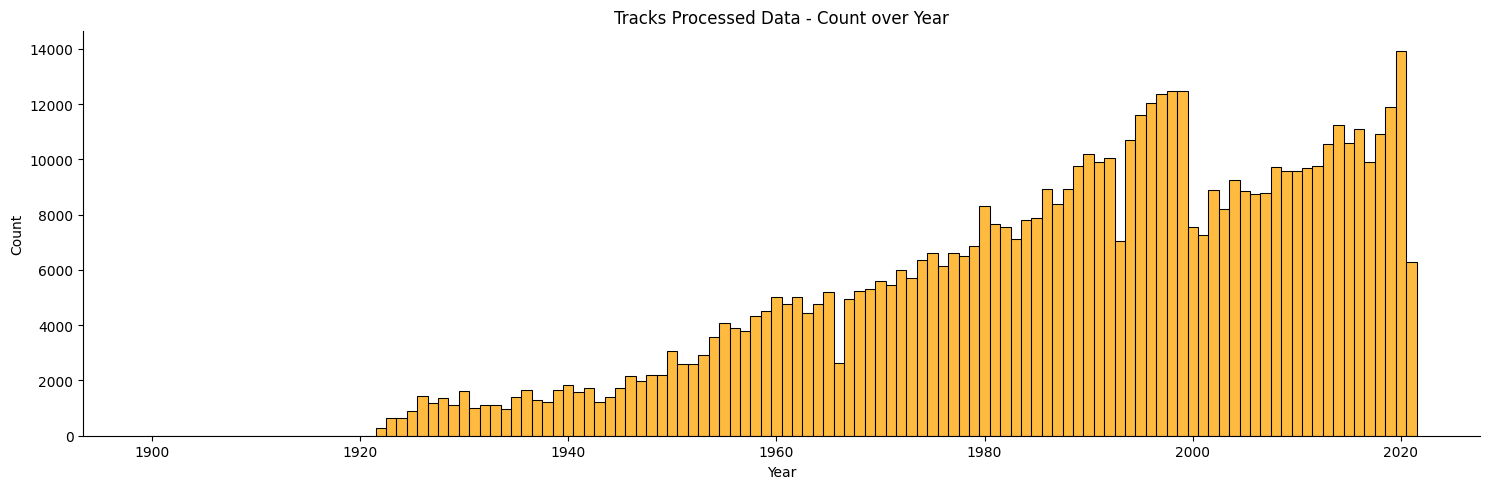

In [6]:
# Histogram
create_category_histogram(df_tracks_processed, column_name="year", data_name="Tracks Processed", show_plot=True, export_plot=True)

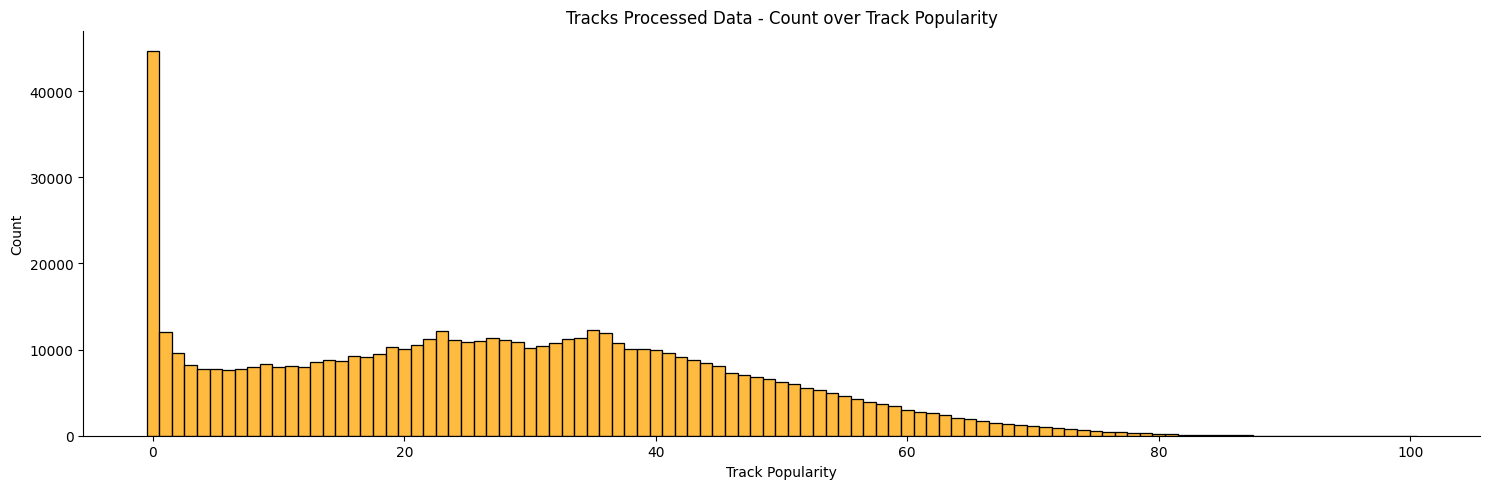

In [7]:
# Histogram
create_category_histogram(df_tracks_processed, column_name="track_popularity", data_name="Tracks Processed", show_plot=True, export_plot=True)

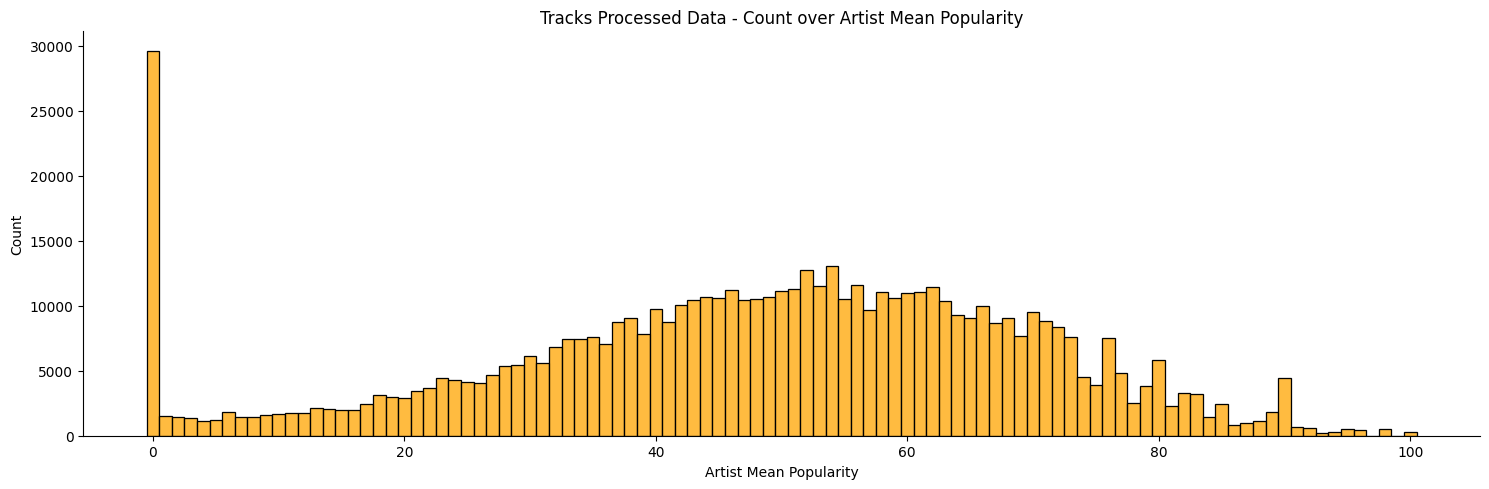

In [8]:
# Histogram
create_category_histogram(df_tracks_processed, column_name="artist_mean_popularity", data_name="Tracks Processed", show_plot=True, export_plot=True)

In [9]:
# Remove 0 within duration_ms
df_tracks_processed = df_tracks_processed[df_tracks_processed["duration_ms"]!=0]

# Remove 0 within artist_total_followers
df_tracks_processed = df_tracks_processed[df_tracks_processed["artist_total_followers"]!=0]

# Remove 0 within artist_mean_popularity
df_tracks_processed = df_tracks_processed[df_tracks_processed["artist_mean_popularity"]!=0]

# Remove 0 within track_popularity
df_tracks_processed = df_tracks_processed[df_tracks_processed["track_popularity"]!=0]

# Get only 1920 to 2020 - a 200 year gap
df_tracks_processed = df_tracks_processed[(df_tracks_processed["year"] >= 1920) & (df_tracks_processed["year"] != 2021)] 

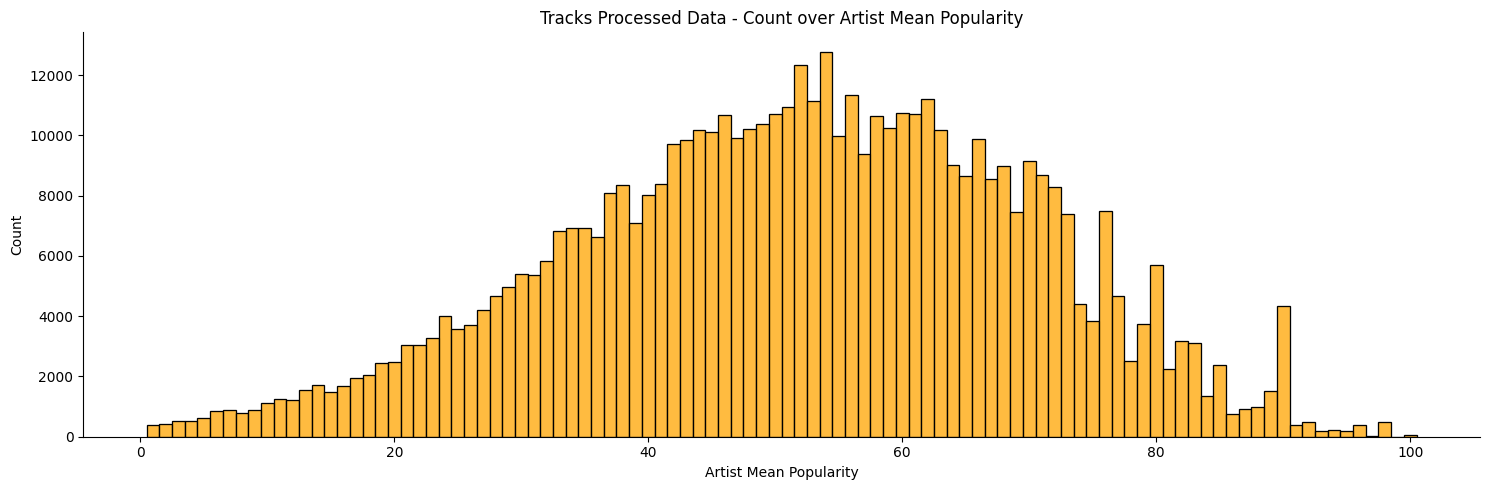

In [13]:
# Histogram
create_category_histogram(df_tracks_processed, column_name="artist_mean_popularity", data_name="Tracks Processed", show_plot=True, export_plot=True)

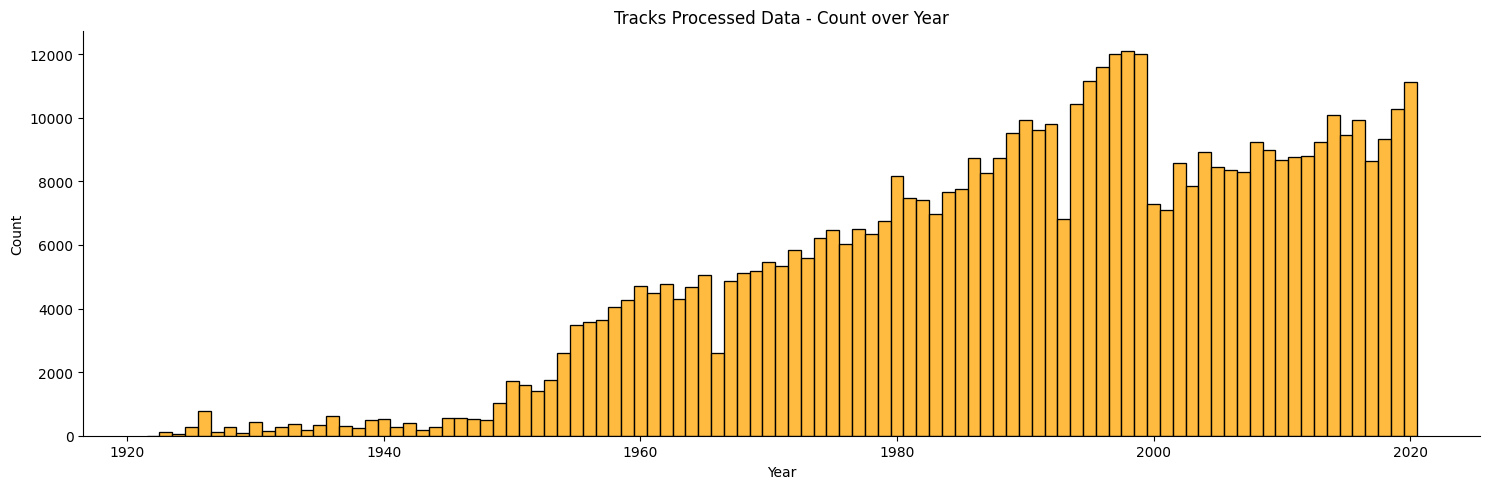

In [12]:
# Histogram
create_category_histogram(df_tracks_processed, column_name="year", data_name="Tracks Processed", show_plot=True, export_plot=True)

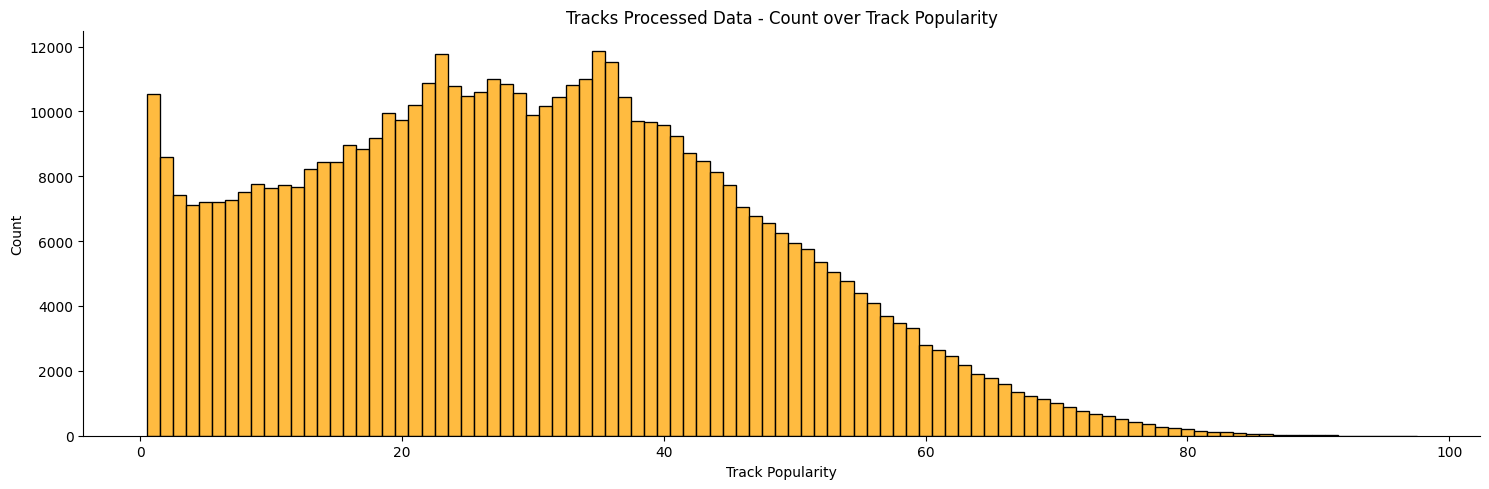

In [11]:
# Histogram
create_category_histogram(df_tracks_processed, column_name="track_popularity", data_name="Tracks Processed", show_plot=True, export_plot=True)